In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

Load image data

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape)

['George W Bush']
(530, 62, 47)


check the total number of samples/images, `N`

In [3]:
#what is N ?
N=faces.images.shape[0]
N

530

check the input dimension (the number of elements in each input sample), `M`

In [4]:
#what is M?
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

Next let's plot the first 100 of these to recall exactly what we're looking at:

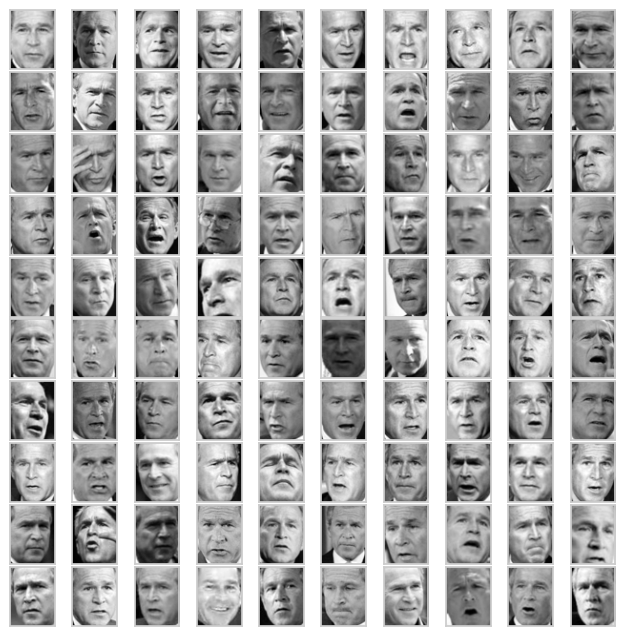

In [5]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(faces.images)

We have N images, and each image has M pixels <br>
N = 530  <  M = 2914 <br>
the number of samples is smaller than the dimension <br>
We will use dimension reduction to reduce the number of features

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=120, whiten=True)
images_2d = faces.images.reshape(N, -1)
pca_d = pca.fit_transform(images_2d)


In [7]:
#check the shape of data
pca_d.shape

(530, 120)

In [8]:
n_components = 120
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance_ratio


array([0.1976196 , 0.3598413 , 0.43596584, 0.4899519 , 0.537241  ,
       0.56677145, 0.59150946, 0.6143572 , 0.63538164, 0.6531239 ,
       0.6694002 , 0.6837186 , 0.69605094, 0.70825976, 0.7180327 ,
       0.72774506, 0.73626095, 0.7443658 , 0.75148374, 0.7582143 ,
       0.76455116, 0.7707081 , 0.7763512 , 0.7817826 , 0.78705025,
       0.7919585 , 0.7965461 , 0.8010332 , 0.8054204 , 0.80957407,
       0.8134882 , 0.8172705 , 0.820907  , 0.8244416 , 0.82782716,
       0.83100986, 0.8341341 , 0.83724576, 0.8401843 , 0.84299177,
       0.8457181 , 0.848387  , 0.85088557, 0.85336083, 0.8558091 ,
       0.8582187 , 0.8605418 , 0.8628532 , 0.8651069 , 0.86729336,
       0.8693904 , 0.87143236, 0.8734362 , 0.875355  , 0.8772396 ,
       0.8790729 , 0.8808746 , 0.8826348 , 0.8843726 , 0.88602203,
       0.8876588 , 0.88925594, 0.89082783, 0.89237356, 0.89388674,
       0.8953793 , 0.896854  , 0.89828193, 0.8996727 , 0.90103567,
       0.90238005, 0.90369636, 0.9050013 , 0.90626585, 0.90750

Afer PCA transform, the number of features is changed from 2914 (62*47) to 120 <br>
N = 530,  data.shape[1] = 120 <br>
Now, we fit many GMM to `data` with different number of components <br>
We will select the best one based on AIC

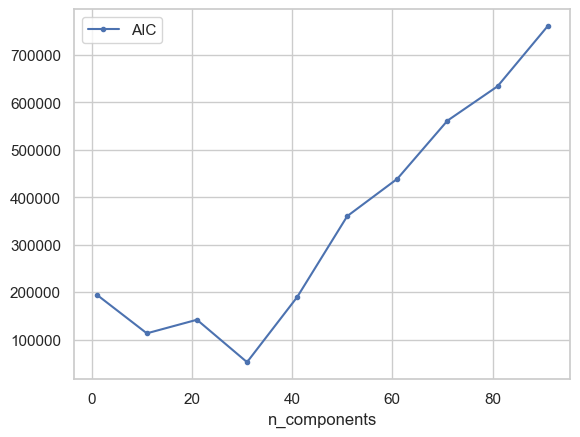

In [9]:
n_components = np.arange(1, 100, 10)
gmm = [GMM(n_components=n).fit(pca_d) for n in n_components]

aic_scores = [m.aic(pca_d) for m in gmm]
plt.plot(n_components, aic_scores, '.-', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Overall, the curve keeps going up: something is weird. <br>
What will the curve be if we have more data to train GMM ? <br>
note: you may get a different curve due to some randomness in initialization.

It looks like when n_components= ?? AIC reaches the minimum. <br>
Let's fit the GMM with n_components=?? (when AIC is minimum), and check if gmm is converged or not 

In [21]:
best_idx = np.argmin(aic_scores)
best_n_components = n_components[best_idx]
best_gmm = gmm[best_idx]


print(best_n_components)
print(best_gmm.converged_)


31
True


Draw 100 new samples from GMM (gmm) <br>
The new data samples are in the 120-dimensional projected space

In [11]:
data_new, _ = best_gmm.sample(100)
data_new.shape
data_new.shape

(100, 120)

Finally, we can transform the 100 samples back to the original space (pca inverse) <br>
and plot some of the images in the original space <br>

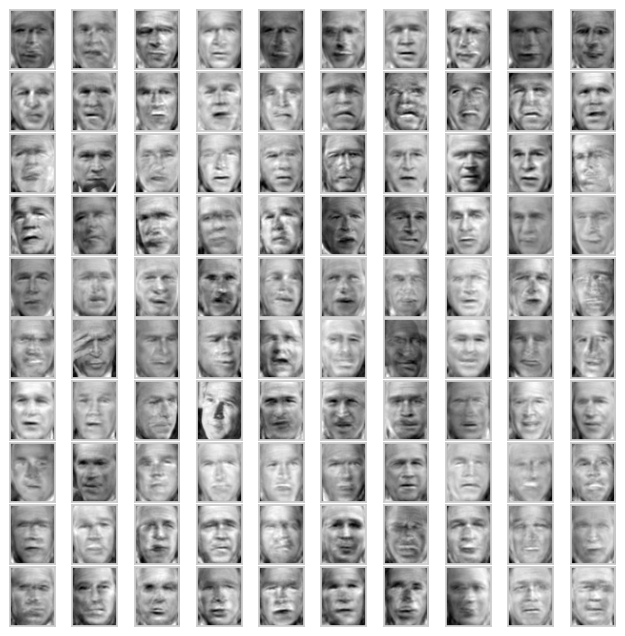

In [12]:
faces_new = pca.inverse_transform(data_new)

plot_faces(faces_new.reshape(-1,62, 47))

### Let's repeat the above process using more data

In [13]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [14]:
N = faces.images.shape[0]
N

1560

In [15]:
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

We have N images, and each iamge has M pixels  <br>
N = 1560 and M = 2914 : N < M  <br>
We will use dimension reduction to reduce the number of features from 2914 to 120 <br>

In [16]:
pca2 = PCA(n_components=120, whiten=True)
images_4d = faces.images.reshape(N, -1)
pca_dd = pca.fit_transform(images_4d)

In [17]:
pca_dd.shape

(1560, 120)

In [18]:
cevr = np.cumsum(pca.explained_variance_ratio_)
cevr

array([0.23761718, 0.36462945, 0.43265113, 0.48670912, 0.53085065,
       0.5567279 , 0.5783912 , 0.59676135, 0.6145508 , 0.63116467,
       0.6451328 , 0.65826213, 0.669055  , 0.6792451 , 0.68890464,
       0.6979311 , 0.7063758 , 0.7145162 , 0.72204   , 0.72916025,
       0.7355515 , 0.7416738 , 0.7472378 , 0.7522166 , 0.757166  ,
       0.76206756, 0.76684284, 0.77135473, 0.7757049 , 0.7796532 ,
       0.7834079 , 0.78701043, 0.7903967 , 0.7937178 , 0.79702586,
       0.8002017 , 0.80318946, 0.8061055 , 0.8089938 , 0.81175065,
       0.81443745, 0.8170749 , 0.81966573, 0.8221482 , 0.8245574 ,
       0.8269113 , 0.8292151 , 0.8314403 , 0.8336512 , 0.8357889 ,
       0.83790785, 0.84000385, 0.842018  , 0.8439776 , 0.8459157 ,
       0.84779775, 0.8496538 , 0.85149103, 0.8532369 , 0.8549725 ,
       0.8566575 , 0.8583032 , 0.8599255 , 0.861538  , 0.8630893 ,
       0.8645955 , 0.86608505, 0.86752254, 0.8689379 , 0.87033916,
       0.8717151 , 0.8730562 , 0.87438625, 0.8756988 , 0.87698

Now, we fit many GMMs to the transformed `data` with different number of components   <br>
We will select the best one based on AIC

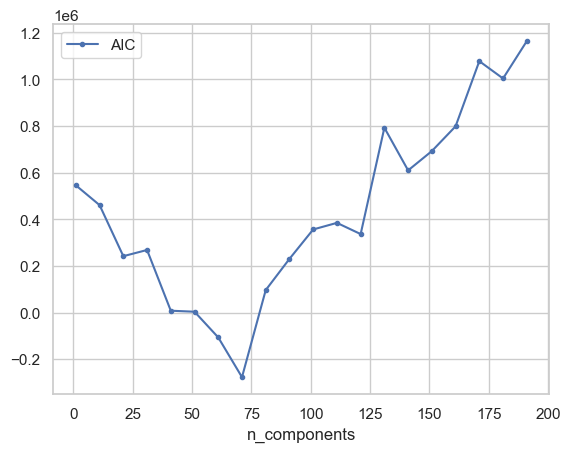

In [19]:
n_components = np.arange(1, 200, 10)
gmm2 = [GMM(n_components=n).fit(pca_dd) for n in n_components]

aic_scoress = [m.aic(pca_dd) for m in gmm2]
plt.plot(n_components, aic_scoress, '.-', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Now, we have a U-haped curve, nice. (again, you may get a different curve) <br>
It appears that AIC is miminized around 60 components. <br>
What is the exact value of n_components when AIC is minimum?

In [22]:
b_idx = np.argmin(aic_scoress)
bn_components = n_components[b_idx]
bn_components

71

Let's quickly fit GMM with n_components=?? (when AIC is minimum) to the `data` and confirm that it has converged:

In [23]:
gmm3 = [GMM(n_components = bn_components).fit(pca_dd) for n in n_components]
aic_scoresss = [m.aic(pca_dd) for m in gmm3]

t_idx = np.argmin(aic_scoresss)
t_gmm = gmm2[t_idx]

print(t_gmm.converged_)

True


Generate 100 new samples from this GMM

In [24]:
data_newer, _ = best_gmm.sample(100)

data_newer.shape

(100, 120)

Transform the 100 new samples back to the original space

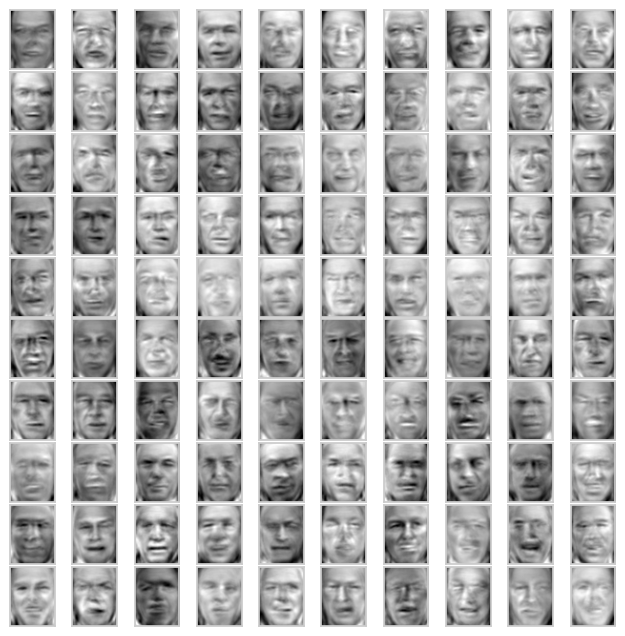

In [25]:
faces_newer = pca.inverse_transform(data_newer)
plot_faces(faces_newer.reshape(-1,62, 47))

GMM is good but very time consuming. PCA+GMM is a good approach to reduce time cost.